In [19]:
patients <- read.table("project_data.txt", header = FALSE, sep = "", dec = ".")
colnames(patients) <- c("id", "psa_level", "cancer_volume", "weight", "age", "benign_prostatic_hyperplasia", "seminal_vesicle_invasion", "capsular_penetration", "gleason_score")
head(patients)

id,psa_level,cancer_volume,weight,age,benign_prostatic_hyperplasia,seminal_vesicle_invasion,capsular_penetration,gleason_score
1,0.651,0.5599,15.959,50,0,0,0,6
2,0.852,0.3716,27.660,58,0,0,0,7
3,0.852,0.6005,14.732,74,0,0,0,7
4,0.852,0.3012,26.576,58,0,0,0,6
5,1.448,2.1170,30.877,62,0,0,0,6
6,2.160,0.3499,25.280,50,0,0,0,6


In [20]:
summary(patients)
round(cor(patients[c("psa_level","cancer_volume","weight","age","benign_prostatic_hyperplasia","seminal_vesicle_invasion","capsular_penetration","gleason_score")]),3) 

       id       psa_level       cancer_volume         weight      
 Min.   : 1   Min.   :  0.651   Min.   : 0.2592   Min.   : 10.70  
 1st Qu.:25   1st Qu.:  5.641   1st Qu.: 1.6653   1st Qu.: 29.37  
 Median :49   Median : 13.330   Median : 4.2631   Median : 37.34  
 Mean   :49   Mean   : 23.730   Mean   : 6.9987   Mean   : 45.49  
 3rd Qu.:73   3rd Qu.: 21.328   3rd Qu.: 8.4149   3rd Qu.: 48.42  
 Max.   :97   Max.   :265.072   Max.   :45.6042   Max.   :450.34  
      age        benign_prostatic_hyperplasia seminal_vesicle_invasion
 Min.   :41.00   Min.   : 0.000               Min.   :0.0000          
 1st Qu.:60.00   1st Qu.: 0.000               1st Qu.:0.0000          
 Median :65.00   Median : 1.350               Median :0.0000          
 Mean   :63.87   Mean   : 2.535               Mean   :0.2165          
 3rd Qu.:68.00   3rd Qu.: 4.759               3rd Qu.:0.0000          
 Max.   :79.00   Max.   :10.278               Max.   :1.0000          
 capsular_penetration gleason_scor

,psa_level,cancer_volume,weight,age,benign_prostatic_hyperplasia,seminal_vesicle_invasion,capsular_penetration,gleason_score
psa_level,1.000,0.624,0.026,0.017,-0.016,0.529,0.551,0.430
cancer_volume,0.624,1.000,0.005,0.039,-0.133,0.582,0.693,0.481
weight,0.026,0.005,1.000,0.164,0.322,-0.002,0.002,-0.024
age,0.017,0.039,0.164,1.000,0.366,0.118,0.100,0.226
benign_prostatic_hyperplasia,-0.016,-0.133,0.322,0.366,1.000,-0.120,-0.083,0.027
seminal_vesicle_invasion,0.529,0.582,-0.002,0.118,-0.120,1.000,0.680,0.429
capsular_penetration,0.551,0.693,0.002,0.100,-0.083,0.680,1.000,0.462
gleason_score,0.430,0.481,-0.024,0.226,0.027,0.429,0.462,1.000


In [50]:
patients.model <- lm(psa_level ~ cancer_volume + seminal_vesicle_invasion, data=patients)

In [51]:
AIC(patients.model)
anova(patients.model)
summary(patients.model)

[1] 946.98

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
cancer_volume,1,62202.343,62202.3427,64.354257,2.869326e-12
seminal_vesicle_invasion,1,6612.592,6612.5917,6.841357,1.037686e-02
Residuals,94,90856.774,966.5614,NA,NA



Call:
lm(formula = psa_level ~ cancer_volume + seminal_vesicle_invasion, 
    data = patients)

Residuals:
    Min      1Q  Median      3Q     Max 
-55.145  -7.535  -1.129   4.256 170.018 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 1.060      4.231   0.251   0.8027    
cancer_volume               2.477      0.495   5.003 2.62e-06 ***
seminal_vesicle_invasion   24.647      9.423   2.616   0.0104 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.09 on 94 degrees of freedom
Multiple R-squared:  0.431,	Adjusted R-squared:  0.4189 
F-statistic:  35.6 on 2 and 94 DF,  p-value: 3.098e-12


In [23]:
patients.model.r1 <- update(patients.model, . ~ . - weight -capsular_penetration)
summary(patients.model.r1)
anova(patients.model.r1)
AIC(patients.model.r1)


Call:
lm(formula = psa_level ~ cancer_volume + age + benign_prostatic_hyperplasia + 
    seminal_vesicle_invasion + gleason_score, data = patients)

Residuals:
    Min      1Q  Median      3Q     Max 
-54.839  -8.758   0.206   5.181 163.883 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  -18.4353    39.8719  -0.462   0.6449    
cancer_volume                  2.2595     0.5238   4.313 4.07e-05 ***
age                           -0.5261     0.4715  -1.116   0.2674    
benign_prostatic_hyperplasia   1.3714     1.1412   1.202   0.2326    
seminal_vesicle_invasion      23.6477     9.6720   2.445   0.0164 *  
gleason_score                  7.4688     5.1080   1.462   0.1471    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 30.94 on 91 degrees of freedom
Multiple R-squared:  0.4543,	Adjusted R-squared:  0.4243 
F-statistic: 15.15 on 5 and 91 DF,  p-value: 8.245e-11


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
cancer_volume,1,62202.342713,62202.342713,64.959385596,2.880403e-12
age,1,8.293344,8.293344,0.008660936,9.260572e-01
benign_prostatic_hyperplasia,1,909.506681,909.506681,0.949819454,3.323489e-01
seminal_vesicle_invasion,1,7366.623010,7366.623010,7.693139580,6.724960e-03
gleason_score,1,2047.216451,2047.216451,2.137956821,1.471381e-01
Residuals,91,87137.726672,957.557436,NA,NA


[1] 948.9259

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): attempt to use zero-length variable name

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_html.list(obj)
9. repr_list_generic(obj, "html", "\t<li>%s</li>\n", "\t<dt>$%s</dt>\n\t\t<dd>%s</dd>\n", 
 .     "<strong>$%s</strong> = %s", "<ol>\n%s</ol>\n", "<dl>\n%s</dl>\n", 
 .     numeric_item = "\t<dt>[[%s]]</dt>\n\t\t<dd>%s</dd>\n", escape_fun = html_escape)


$Independence
$Independence[[1]]

	Runs Test - Two sided

data:  re
Standardized Runs Statistic = 1.3281, p-value = 0.1842


$Independence[[2]]
 lag Autocorrelation D-W Statistic p-value
   1       0.4592604      0.800488       0
 Alternative hypothesis: rho != 0


$Normality

	Shapiro-Wilk normality test

data:  re
W = 0.62063, p-value = 1.84e-14


[[3]]
[1] "Constant Variance only valid if data are in groups"

$ConstantVar
Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 195.9685    Df = 1     p = 1.583566e-44 


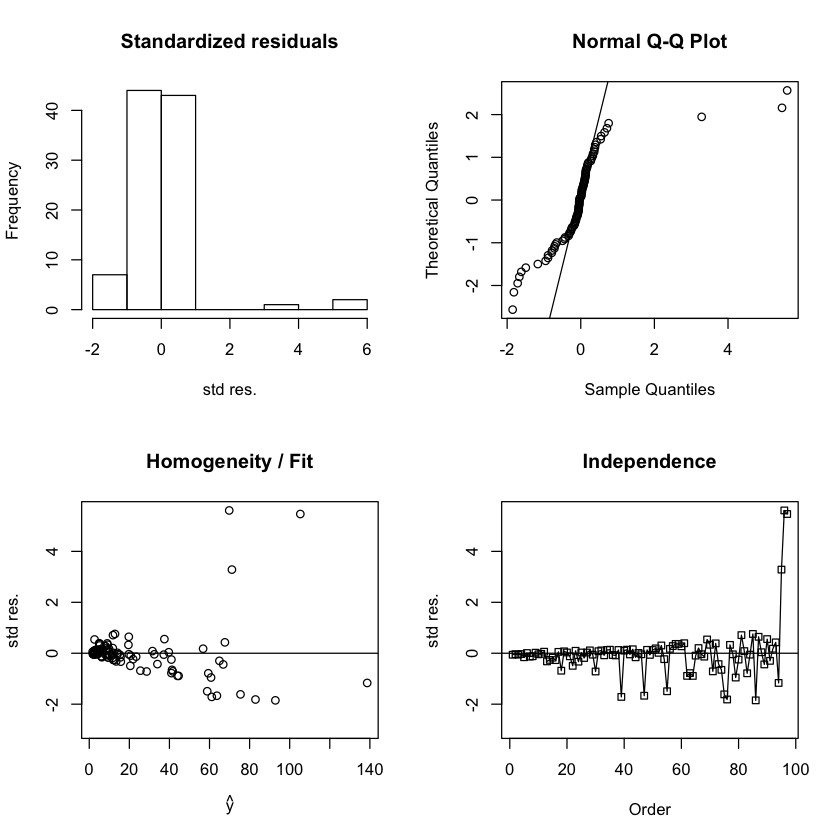

In [52]:
source("http://www.stat.ufl.edu/~athienit/check.R")
check(patients.model,tests=TRUE)